# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries and data

In [1]:
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc = {'figure.figsize':(15,8)})

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore') # ignore warnings and do not display them

## Loading the dataset

In [2]:
df = pd.read_csv("used_device_data.csv")

## Data Overview

In [3]:
# Viewing the first 5 rows of the data frame
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [4]:
# Viewing the last 5 rows of the data frame
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


In [5]:
print("The number of rows in provided set are: " + 
      "\033[1m" + str(df.shape[0]) + "\033[0m" + 
      "\nThe number of columns in provided dataset are: \033[1m" + str(df.shape[1]) + "\033[0m" + "\n")
print("\033[1mThe datatypes in provided dataset: \033[0m")
print(df.info())

The number of rows in provided set are: 3454
The number of columns in provided dataset are: 15

The datatypes in provided dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 

## Exploratory Data Analysis (EDA)

In [6]:
print("\033[1mThe sum of null values in each column: \033[0m")
print(df.isnull().sum())
print("\n")
print("\033[1mHere is the statistical summary of provided data:\033[0m")
print(df.describe())

The sum of null values in each column: 
brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


Here is the statistical summary of provided data:
       screen_size  main_camera_mp  selfie_camera_mp   int_memory  \
count  3454.000000     3275.000000       3452.000000  3450.000000   
mean     13.713115        9.460208          6.554229    54.573099   
std       3.805280        4.815461          6.970372    84.972371   
min       5.080000        0.080000          0.000000     0.010000   
25%      12.700000        5.000000          2.000000    16.000000   
50%      12.830000        8.000000          5.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [7]:
# Copying data to avoid any changes to original data
data = df.copy()

# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
     )  # Add median to the histogram

**1. Normalized Used Devices Price**

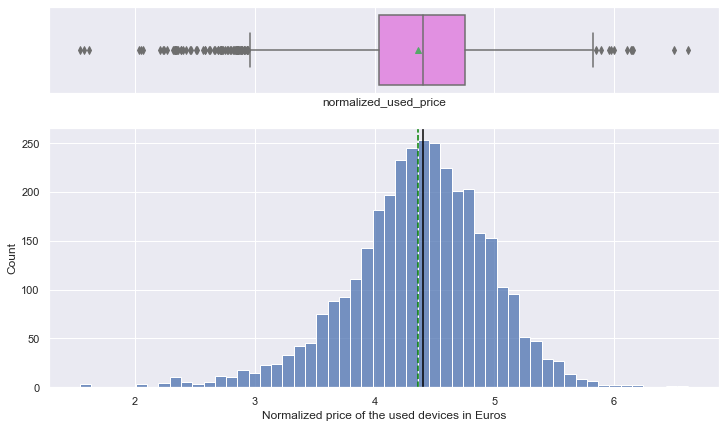

In [8]:
histogram_boxplot(data,"normalized_used_price")
plt.xlabel("Normalized price of the used devices in Euros");

#### Observations:
- The price of used phones approximately follows a normal distribution
- From the box_plot we can see that there are outliers 

In [9]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

**2. Operating System**

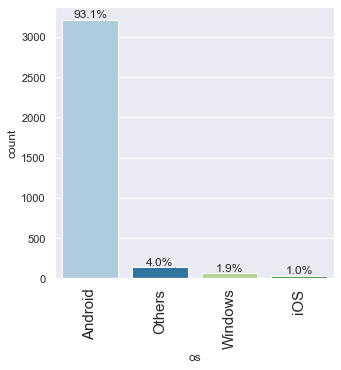

In [10]:
labeled_barplot(data, "os", perc=True,)

#### Observation:
- Android devices are the most refurbished ones with a percentage of 93.1 in the Refurbished market
- iOS devices are the least refurbished ones with a percentage of 1.0% in the refurbished market

**3. Ram Analysis**

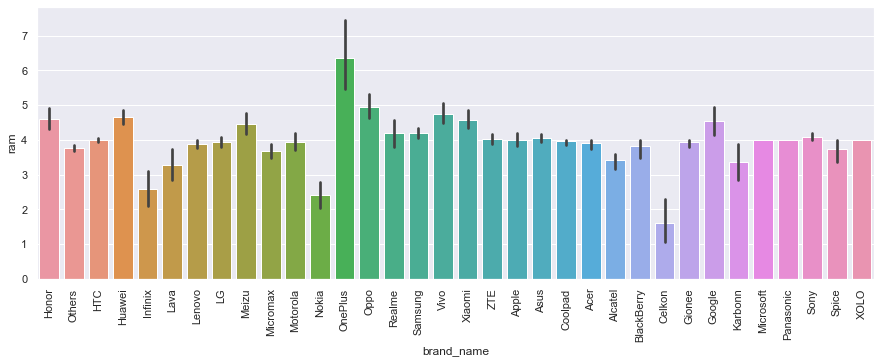

In [11]:
plt.figure(figsize=(15, 5))
sns.barplot(x="brand_name", y="ram", data=data)
plt.xticks(rotation=90);

#### Observation: 
- OnePlus brand gives more RAM to the devices

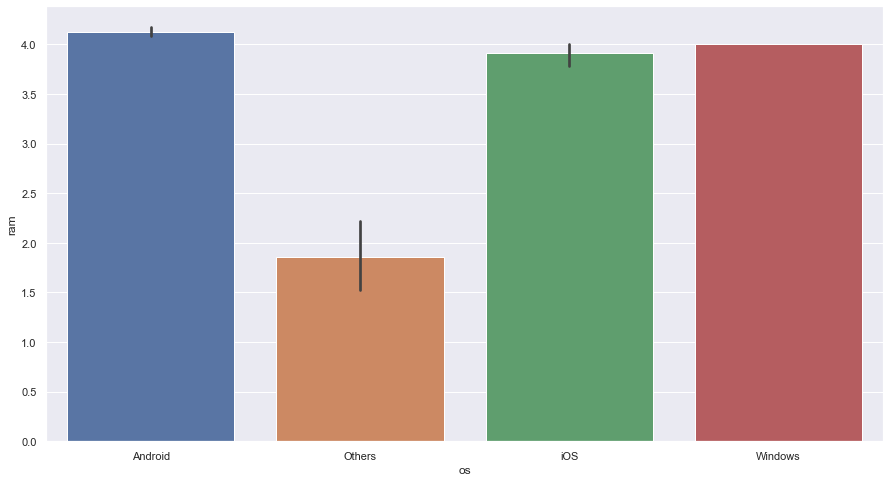

In [12]:
sns.barplot(x="os", y="ram", data=data);

#### Observations:
- Android offers the most RAM

**4. Batteries Analysis**

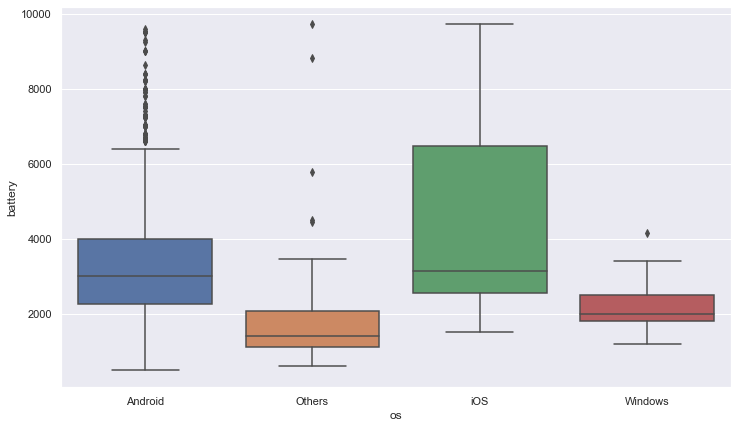

In [13]:
# os vs battery
sns.set(rc = {'figure.figsize':(12,7)}) # set figure size
sns.boxplot(x="os", y="battery", data=data);

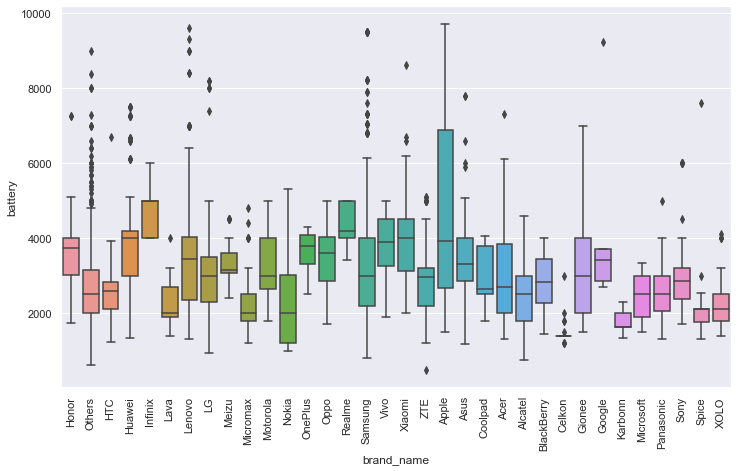

In [14]:
# brand name vs battery
sns.boxplot(x="brand_name", y="battery", data=data)
plt.xticks(rotation=90);

#### Observations:
- Apple brand offers most of its devices with a large Energy capacity of the device battery in mAh

In [15]:
data_large_battery = data[data.battery > 4500]
data_large_battery.shape

(341, 15)

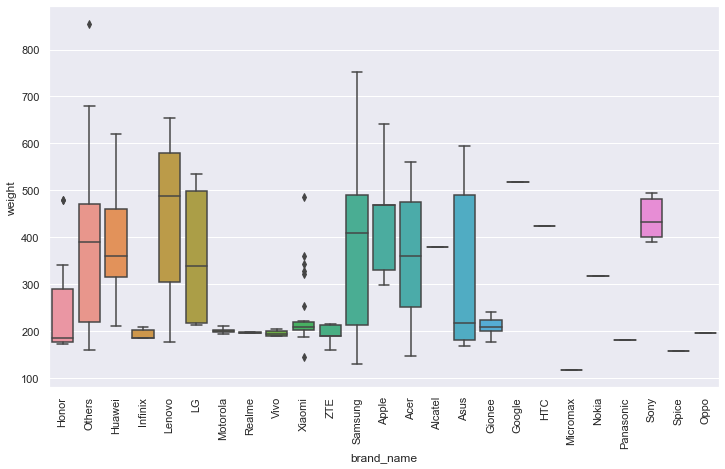

In [16]:
sns.boxplot(x="brand_name", y ="weight", data=data_large_battery)
plt.xticks(rotation=90);

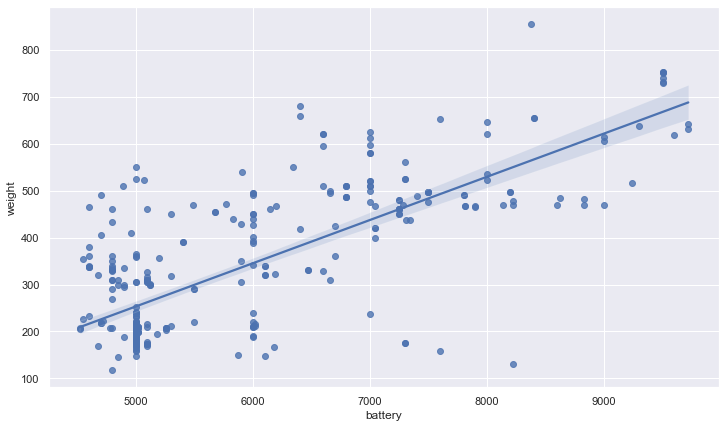

In [17]:
sns.regplot(x="battery", y ="weight", data=data_large_battery);

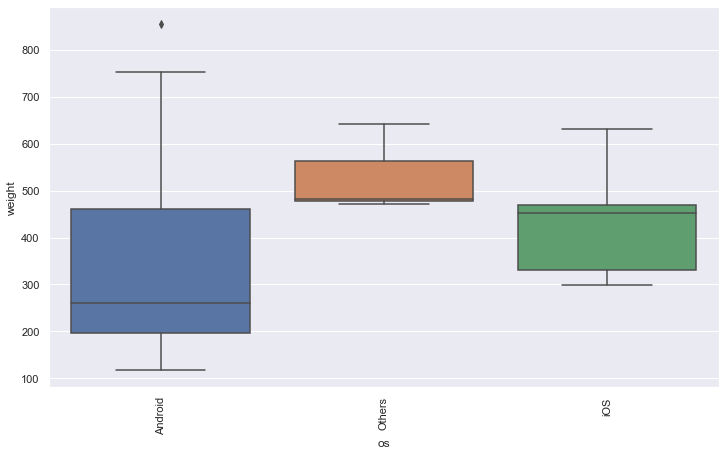

In [18]:
# weight vs os
sns.boxplot(x="os", y ="weight", data=data_large_battery)
plt.xticks(rotation=90);

#### Observations:
- The Samsung brand gives most of its devices large batteries of more than 4500 mAh. This means samsung phones are heavier as compared to other brands.
- Phones with large batteries of more than 4500 mAh most fall under the Android OS category. This means that Android phones are generally more heavier.
- As battery capacity increases weight increase

**5. Screens Analysis**

In [19]:
# create a dataframe for devices with screensize larger than 6 inches
df_large_screen = data[data.screen_size > 6 * 2.54] # 1 inch = 2.54 centimetres
df_large_screen.shape

(1099, 15)

In [20]:
df_large_screen["brand_name"].value_counts().head()

Huawei     149
Samsung    119
Others      99
Vivo        80
Honor       72
Name: brand_name, dtype: int64

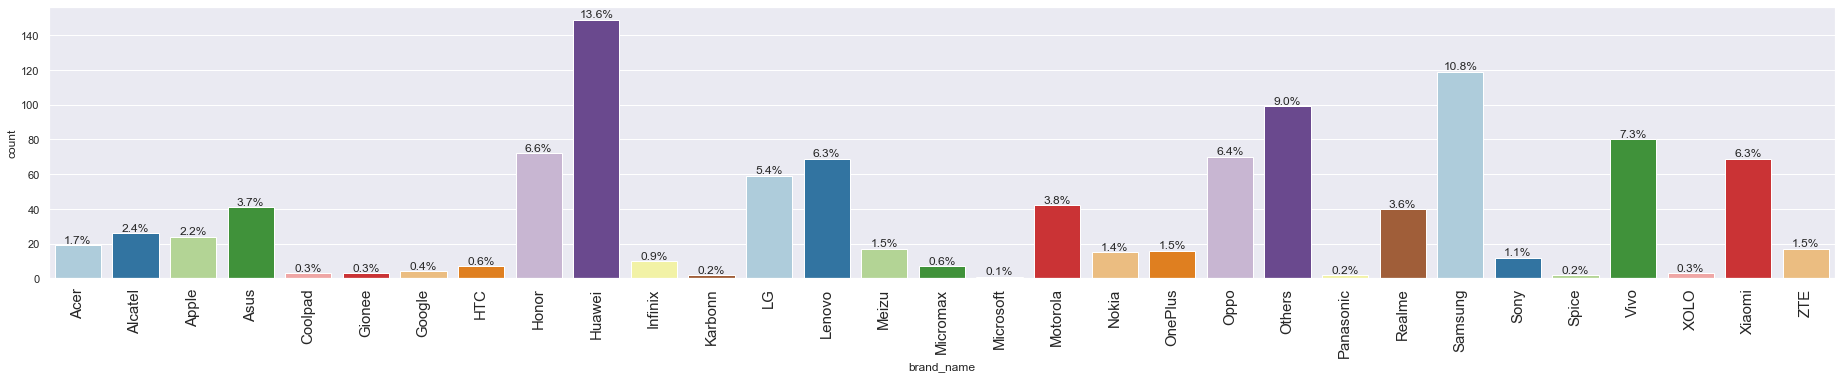

In [21]:
labeled_barplot(df_large_screen, "brand_name", perc=True);

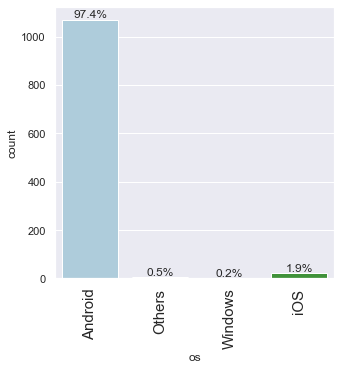

In [22]:
labeled_barplot(df_large_screen, "os", perc=True);

#### Observations:
- Huawei brand name has the highest percentage of devices with a screen size larger than 6 inches
- Android offer a large screen > 6 inches size for most of their devices as seen from the bar plot above

#### 6. Camera Analysis

In [23]:
df_selfie_camera_pixels = data[data["selfie_camera_mp"] > 8]
df_selfie_camera_pixels.shape

(655, 15)

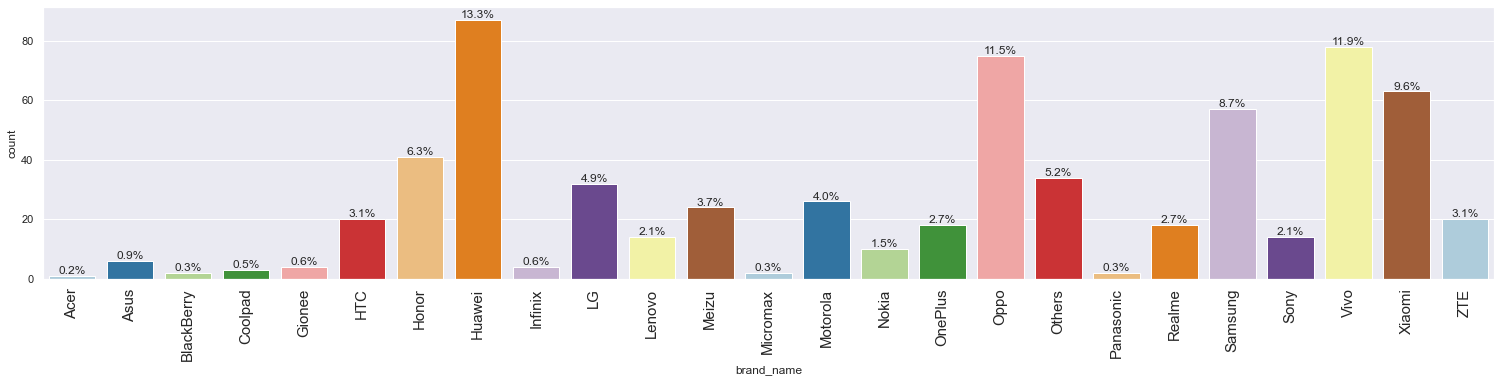

In [24]:
# selfie_camera_mp vs brand_name
labeled_barplot(df_selfie_camera_pixels, "brand_name", perc=True);

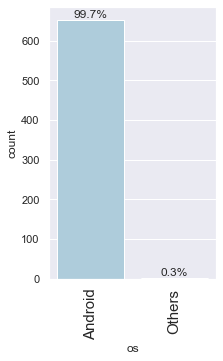

In [25]:
# selfie_camera_mp vs os
labeled_barplot(df_selfie_camera_pixels, "os", perc=True);

#### Observations:
- Android offers the greatest number of devices with selfie camera mega pixels greter than 8. This could probably be one of the reasons they have the biggest number in the market of refurbished devices
- Huawei devices are the ones with the greatest count with selfie camera mega pixels greater than 8
- iOS devices don't offer selfie camera mega pixels greater than 8

#### 7. Correlation heatmap

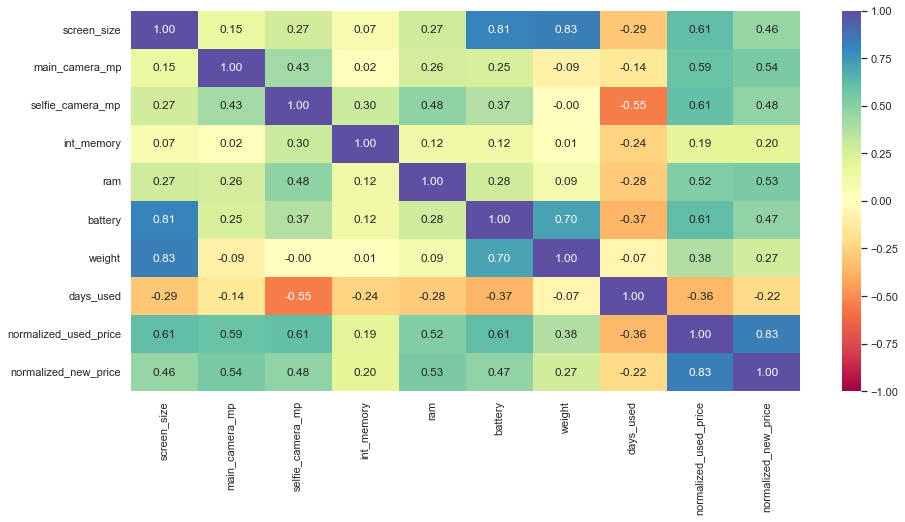

In [26]:
# creating a list of numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("release_year")  # dropping the release_year column as it is temporal variable

# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
);

#### Observations:
- Normalized_new_price and normalized_used_price show high correlation
- There is a negative correlation between days_used and  normalized_used_price

#### Normalized used devices price vs Operating system

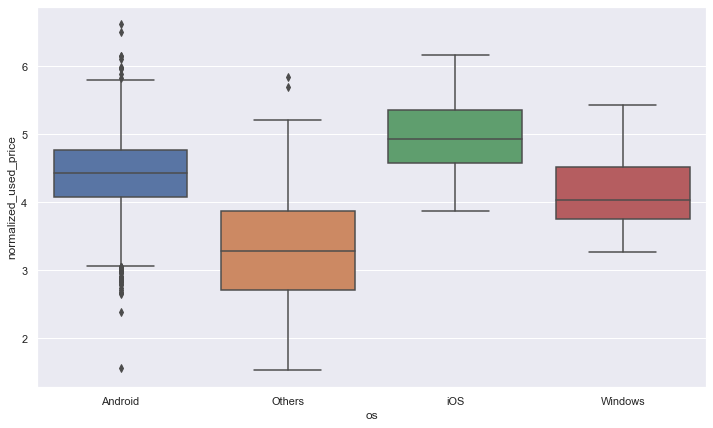

In [27]:
sns.boxplot(x="os", y="normalized_used_price", data=data);

#### Observations:
- Normalized used price is higher for iOS devices

### Selfie camera mega pixels vs normalized used price vs OS

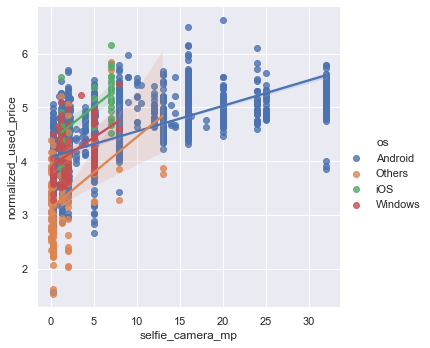

In [28]:
sns.lmplot(x = 'selfie_camera_mp', y = 'normalized_used_price', data = data, hue = 'os');

### Let us take a look at how normalized used price of the devices among different release years

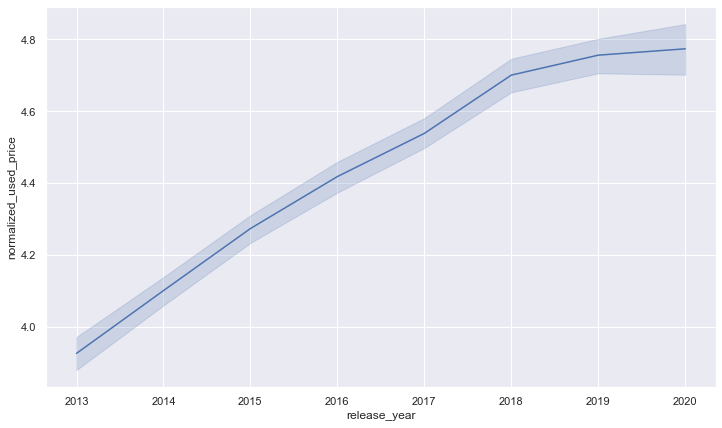

In [29]:
sns.lineplot(x="release_year", y="normalized_used_price", data=data);

#### Observations:
- The price of refurbished phones keeps increasing over years. The newer the release year the higher the price

## Data Preprocessing

### Missing Value Treatment

In [30]:
# creating a copy of the data frame
df1 = data.copy()

In [31]:
# let us looking at missing values in the dataframe again
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- Let us impute missing values in the columns with median of the columns grouped by release year and brand name

In [32]:
cols_to_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_to_impute:
    df1[col] = df1.groupby([ "brand_name", "release_year"])[col].transform(
        lambda x: x.fillna(x.median())
    ) 

In [33]:
# check if there are still missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

- There are still have missing values missng values.
- Let us impute these missing values with median of the columns grouped by just brand name

In [34]:
cols_to_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_to_impute:
    df1[col] = df1.groupby('brand_name')[col].transform(
        lambda x: x.fillna(x.median())
    )

In [35]:
# re-check missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

- main_camera_mp still has 10 missing values
- Letus go ahead and impute these missing values with the median of the column(main_camera_mp)

In [36]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

In [37]:
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

**No more missing values**

### Log Transformation

In [38]:
# perform log transformation on the weight column and create a new column called *weight_log*
df1["weight_log"] = np.log(df1["weight"])
df1.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356


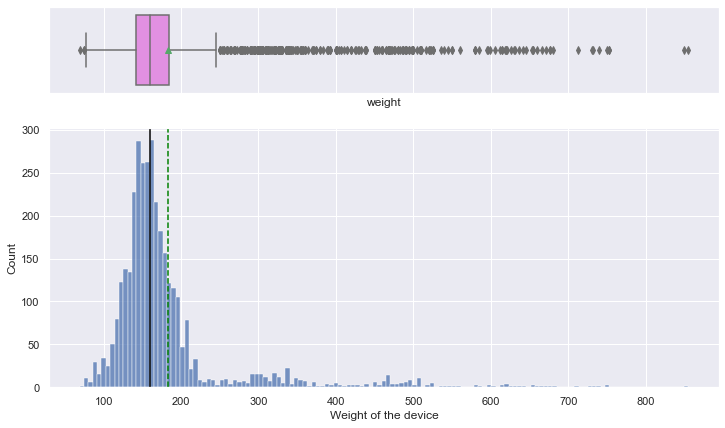

In [39]:
# weight column distribution before log transformation
histogram_boxplot(data,"weight")
plt.xlabel("Weight of the device");

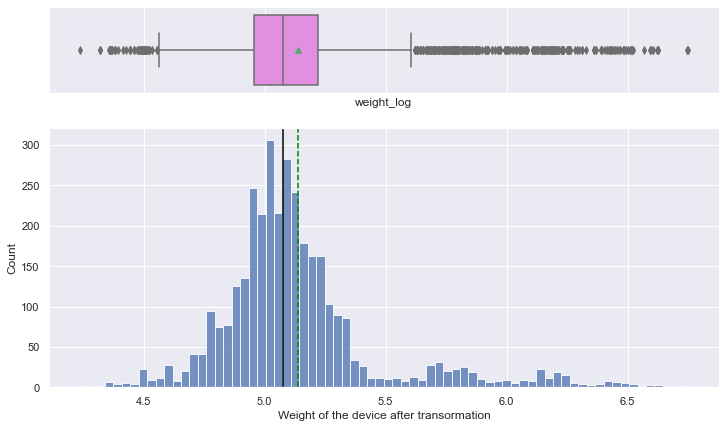

In [40]:
# weight column distribution after log transformation
histogram_boxplot(df1,"weight_log")
plt.xlabel("Weight of the device after transormation");

#### Observations:
- The weight column distribution after log transformation behaves better as compared to before
- We will go ahead and drop the weight column and leave the weight_log column

In [41]:
# drop weight column
df1.drop(["weight"], axis=1, inplace=True)

### Feature Engineering

- Let's create a new column years_since_release from the **release_year column**.
- We will consider the year of data collection, **2021**, as the baseline as it was the year this data was collected
- We will drop the **release_year column**.

In [42]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True) # drop release_year column
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

### Outlier Check

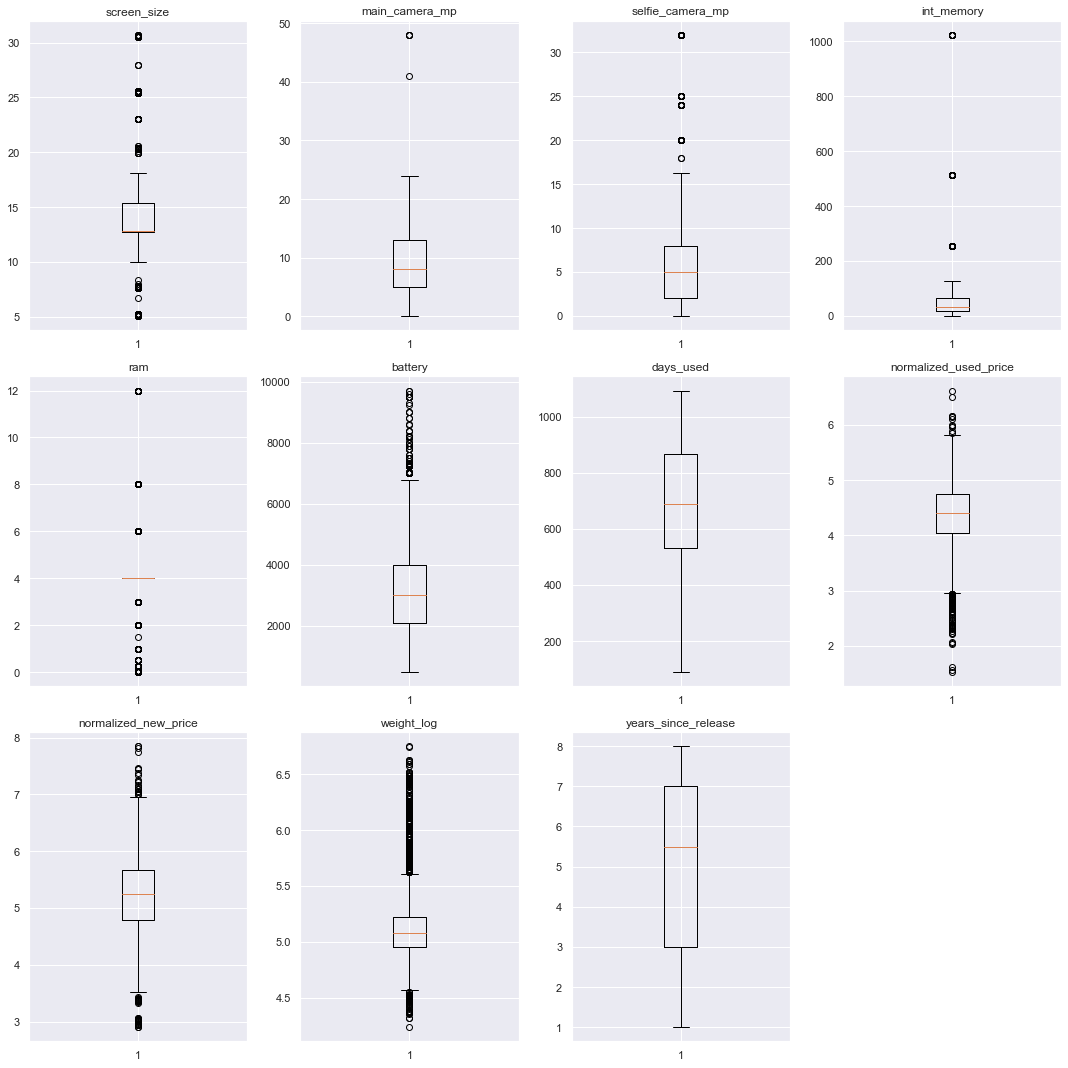

In [43]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Outlier Treament

In [44]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [45]:
# list of columns to treat for outliers
treat_out_cols = ["weight_log", "normalized_new_price", "battery", 
                  "int_memory", "selfie_camera_mp", "main_camera_mp", "screen_size"] 

**NB**: We will not treat outliers in the <mark>ram</mark> column as doing so will remove the variation in the column and most likely make it a constant, which is not desirable, and so it is omitted in the list of columns to treat.

In [46]:
# create a new data frame after treating outliers in the colums
df2 = treat_outliers_all(df1, treat_out_cols)

### Re-check columns to see if outliers were treated

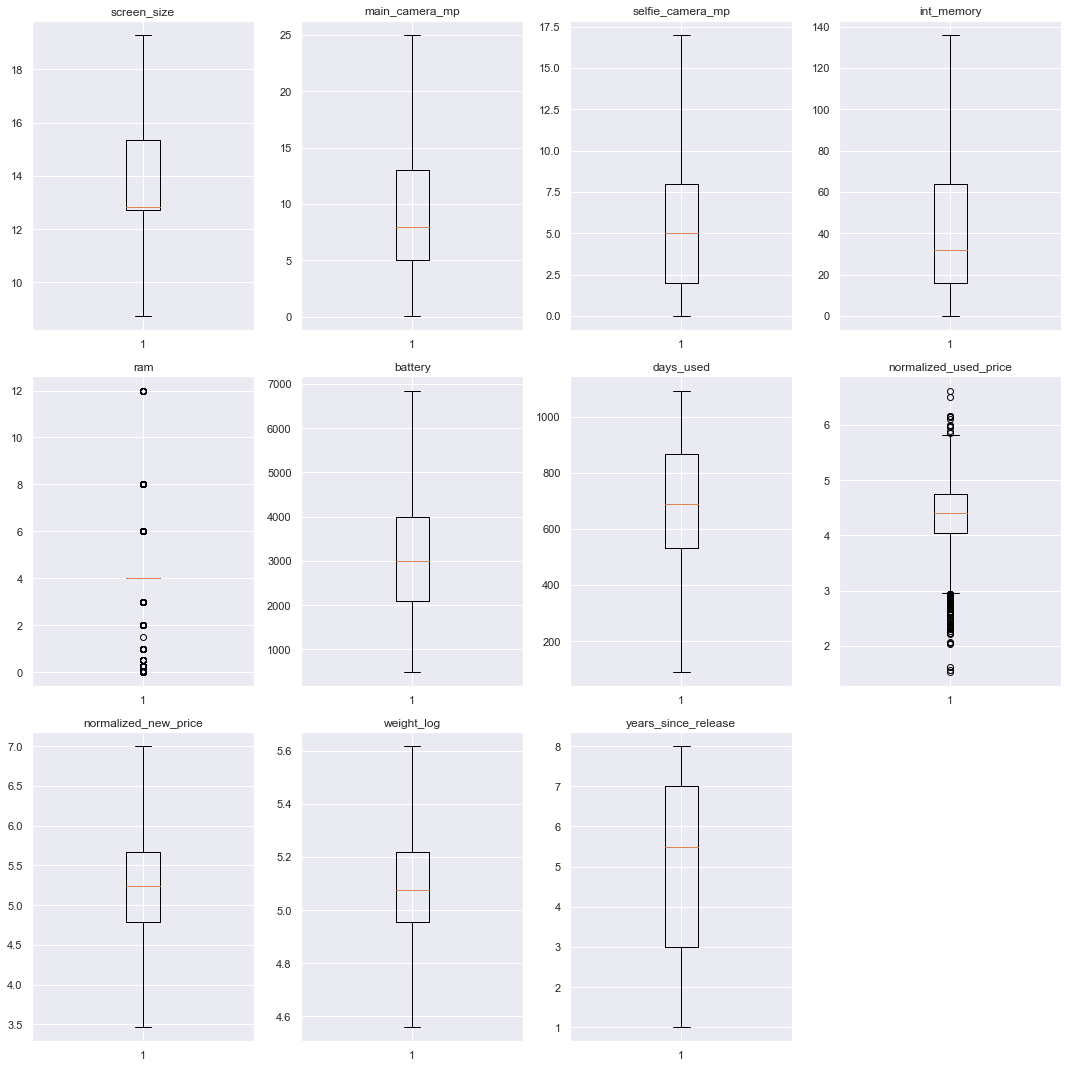

In [47]:
# outlier detection using boxplot
numeric_columns = df2.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- All outliers in the independent columns were treated apart from the **ram** column

### EDA After Data Manipulation 

In [48]:
print("\033[1mThe sum of null values in each column: \033[0m")
print(df2.isnull().sum())
print("\n")
print("\033[1mHere is the statistical summary of provided data:\033[0m")
print(df2.describe())

The sum of null values in each column: 
brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
days_used                0
normalized_used_price    0
normalized_new_price     0
weight_log               0
years_since_release      0
dtype: int64


Here is the statistical summary of provided data:
       screen_size  main_camera_mp  selfie_camera_mp   int_memory  \
count  3454.000000     3454.000000       3454.000000  3454.000000   
mean     13.551595        9.586329          5.962420    44.694079   
std       2.807499        4.572418          5.345927    39.079988   
min       8.740000        0.080000          0.000000     0.010000   
25%      12.700000        5.000000          2.000000    16.000000   
50%      12.830000        8.000000          5.000000    32.000000   
75%    

In [49]:
df2["brand_name"].nunique()

34

- This column has very many categories(34) which means after creating dummies, very many columns will be formed
- This information in the brand name column can be grouped int <mark>os</mark> which column we already have and with fewer unique values
- Hence, let us go ahead and drop it

In [50]:
df2.drop(["brand_name"], axis=1, inplace=True) # drop brand_name column
df2.head()

,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_used_price,normalized_new_price,weight_log,years_since_release
0,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,127,4.307572,4.715100,4.983607,1
1,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,325,5.162097,5.519018,5.361292,1
2,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,162,5.111084,5.884631,5.361292,1
3,Android,19.30,yes,yes,13.0,8.0,64.0,6.0,6850.0,345,5.135387,5.630961,5.617149,1
4,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,293,4.389995,4.947837,5.220356,1


- brand_name column dropped.

## Data preparation for modeling

In [51]:
# define dependent and independent variables
X = df2.drop(["normalized_used_price"], axis=1)
y = df2["normalized_used_price"]

print(X.head())
print()
print(y.head())

        os  screen_size   4g   5g  main_camera_mp  selfie_camera_mp  \
0  Android        14.50  yes   no            13.0               5.0   
1  Android        17.30  yes  yes            13.0              16.0   
2  Android        16.69  yes  yes            13.0               8.0   
3  Android        19.30  yes  yes            13.0               8.0   
4  Android        15.32  yes   no            13.0               8.0   

   int_memory  ram  battery  days_used  normalized_new_price  weight_log  \
0        64.0  3.0   3020.0        127              4.715100    4.983607   
1       128.0  8.0   4300.0        325              5.519018    5.361292   
2       128.0  8.0   4200.0        162              5.884631    5.361292   
3        64.0  6.0   6850.0        345              5.630961    5.617149   
4        64.0  3.0   5000.0        293              4.947837    5.220356   

   years_since_release  
0                    1  
1                    1  
2                    1  
3               

In [52]:
# let's add the intercept to data
X = sm.add_constant(X)

In [53]:
# creating dummy variables

X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# to ensure all variables are of float type
X = X.astype(float)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,days_used,normalized_new_price,weight_log,years_since_release,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,127.0,4.715100,4.983607,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,325.0,5.519018,5.361292,1.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,162.0,5.884631,5.361292,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,19.30,13.0,8.0,64.0,6.0,6850.0,345.0,5.630961,5.617149,1.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,293.0,4.947837,5.220356,1.0,0.0,0.0,0.0,1.0,0.0


In [54]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [55]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Building a Linear Regression model

In [56]:
# fitting a linear model
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     812.6
Date:                   Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                           14:58:53   Log-Likelihood:                 52.372
No. Observations:                   2417   AIC:                            -72.74
Df Residuals:                       2401   BIC:                             19.90
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Observation:
- Adjusted R-Squared is equal 0.834, which is good
- The y-intercept is equal to the value of the const coeffiecient which is -0.0729
- The coefficients of the different predictor variables is well listed in the model summary forexample;
    - The coefficient of <mark>normalized_new_price</mark> is equal to **0.4116**

## Model performance evaluation
- Let us check the performance of our initial model

In [57]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [58]:
# Checking model performance on train set
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236784,0.183228,0.835434,0.834337,4.414471


In [59]:
# Checking model performance on test set
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.243144,0.18733,0.83609,0.833518,4.577868


### Key Observations:

Training Performance: The training $R^2$ of 0.834 indicates the model avoids underfitting.

Generalization: Comparable train and test RMSE and MAE values suggest a lack of overfitting.

Prediction Accuracy: With a test MAE of 0.187, the model predicts used device prices with a mean error.

Precision: A test MAPE of 4.58% signifies accurate predictions within a 4.6% margin of used device prices.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied. Let us go ahead and check the for the linear regression assumptions.

### 1. Multicollinaerity Test
- This predictor variables in the regression model should not be correlated, hence no multicollinearity

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [61]:
checking_vif(x_train)

,feature,VIF
0,const,1227.232818
1,screen_size,5.020059
2,main_camera_mp,2.130616
3,selfie_camera_mp,3.613245
4,int_memory,2.149691
5,ram,2.061785
6,battery,3.511445
7,days_used,2.579919
8,normalized_new_price,2.795831
9,weight_log,4.297022


#### Observations:
- If VIF is between 1 and 5, then there is low multicollinearity.
- If VIF is between 5 and 10, we say there is moderate multicollinearity.
- If VIF is exceeding 10, it shows signs of high multicollinearity.

**Therefore**: - <mark>screen_size</mark> and <mark>years_since_release</mark> show moderate collinearity
 Let us go ahead and treat the multicollinearity

In [62]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [63]:
col_list = [
    "screen_size",
    "years_since_release"
]

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.834071,0.237812
1,screen_size,0.826593,0.243112


* Dropping `screen_size` will have the maximum impact on the predictive power of the model as compared to `years_since_release`.
* Therefore we'll drop `years_since_release` and check the VIF again.

In [64]:
col_to_drop = "years_since_release"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  years_since_release


,feature,VIF
0,const,1227.210923
1,screen_size,4.947946
2,main_camera_mp,2.120467
3,selfie_camera_mp,3.104717
4,int_memory,2.104077
5,ram,2.057198
6,battery,3.436401
7,days_used,1.857689
8,normalized_new_price,2.488419
9,weight_log,4.283882


- Dropping `years_since_release` has brought the VIF of `screen_size` below 5.
- Hence the above predictors have no multicollinearity and **the assumption is satisfied**
- Let us check the model summary again

In [65]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     868.5
Date:                   Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                           14:58:54   Log-Likelihood:                 49.427
No. Observations:                   2417   AIC:                            -68.85
Df Residuals:                       2402   BIC:                             18.00
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

#### Observations:

- We can see that adj. R-squared has not changed at all, which shows that the dropped column did not have much effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.

### Dropping high p-value variables

- `const`, `battery `, `days_used`, `os_Windows`, `os_iOS` and `5g_yes` have p-value > 0.05. So, they are not significant and we'll drop them all one at a time except the constant.

In [66]:
# initial list of columns
cols = x_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'normalized_new_price', 'weight_log', 'os_Others', '4g_yes']


In [67]:
x_train3 = x_train2[["const"] + selected_features]
x_test3 = x_test2[["const"] + selected_features]

In [68]:
# print model summary
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     1350.
Date:                   Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                           14:58:54   Log-Likelihood:                 46.606
No. Observations:                   2417   AIC:                            -73.21
Df Residuals:                       2407   BIC:                            -15.31
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

**All features in x_train3 have p-values below 0.05, confirming their statistical significance. Consequently, x_train3 stands as the definitive set of predictor variables, and the model olsmod2 is deemed final.**

#### Observations:

- Now adjusted R-squared is 0.834, i.e., our model is able to explain ~83% of the variance. This shows that the model is good.
- The adjusted R-squared in **olsmodel** (where we considered all the variables) was 0.834. This shows that the variables we dropped were not affecting the model much.

### 2. Linearity & Independance Test

In [69]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.800785,0.286703
1525,4.448399,4.671627,-0.223227
1128,4.315353,4.312365,0.002987
3003,4.282068,4.203344,0.078724
2907,4.456438,4.494569,-0.038130


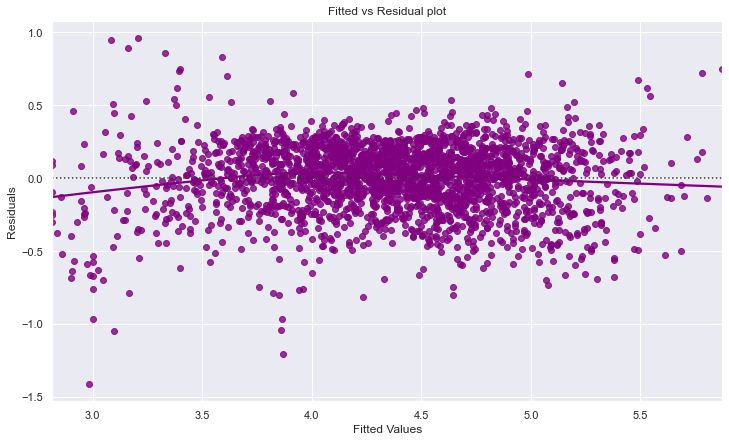

In [70]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

- The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).
- **There is no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### 3. Normality Test

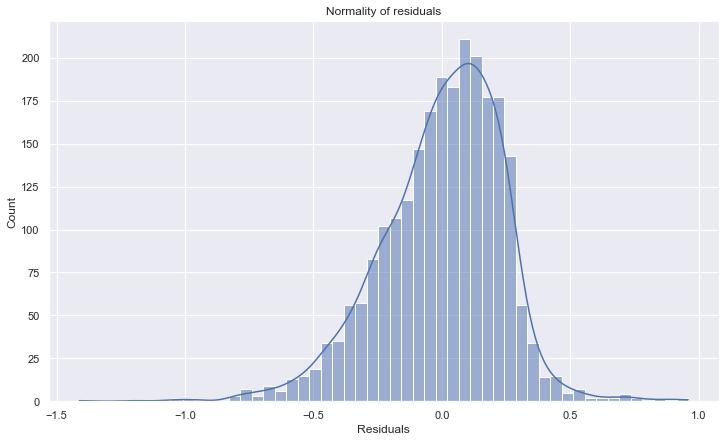

In [71]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

#### Observations:
- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

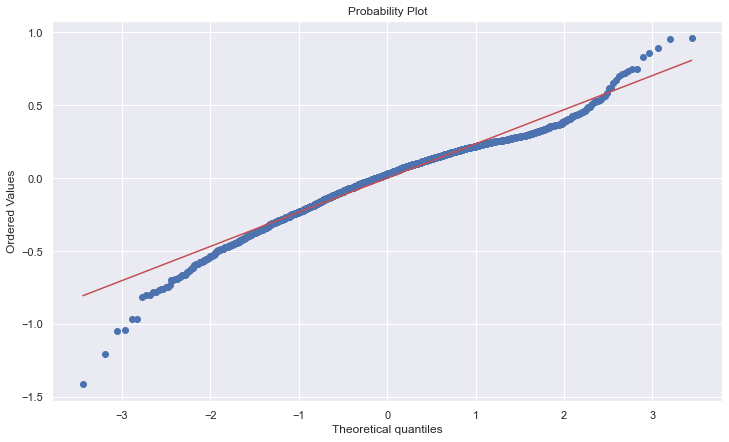

In [72]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Observations:
- The residuals more or less follow a straight line except for the tails.
- Let's us see the results of the Shapiro-Wilk test.

In [73]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9711180329322815, pvalue=1.1404088285366056e-21)

#### Observations:
- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

## Final Model Summary

In [74]:
olsmodel_final = sm.OLS(y_train, x_train3).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.835
Model:                               OLS   Adj. R-squared:                  0.834
Method:                    Least Squares   F-statistic:                     1350.
Date:                   Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                           14:58:55   Log-Likelihood:                 46.606
No. Observations:                   2417   AIC:                            -73.21
Df Residuals:                       2407   BIC:                            -15.31
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [75]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmodel_final, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23735,0.183576,0.834647,0.83396,4.424958


In [76]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmodel_final, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244273,0.188165,0.834565,0.832952,4.607551


#### Summary:

- The model exhibits a commendable explanatory power, capturing approximately 83% of the data variation.

- Both train and test Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) are low and comparable, indicating the absence of overfitting.

- The Mean Absolute Percentage Error (MAPE) on the test set signifies a predictive accuracy within a 4.6% margin, demonstrating the model's effectiveness in forecasting used device prices.

- Consequently, it can be inferred that the olsmod2 model is well-suited for both prediction and inference tasks.

## Actionable Insights and Recommendations

- Correlation: Higher new device prices strongly correlate with increased refurbished device prices.

- Weight Impact: A one-unit weight increase results in a €0.2612 rise in refurbished device price.

- Positive Coefficients: Features like screen size, camera specs, internal memory, RAM, new device price, weight, and 4G capability positively influence used device prices.

- Negative Coefficients: Devices with operating systems other than Android, iOS, and Windows exhibit reduced used device prices.

#### Key Takeaway:
Factors significantly affecting refurbished device prices include screen size, camera specs, internal memory, RAM, new device price, weight, 4G capability, and operating system. Notably, factors like usage days, battery condition, and release years have minimal impact in the refurbished market, emphasizing the importance of device repair standards for market success.

 ### This Project belongs to Syed Abdul Jaleel 